In [1]:
!pip install pyper

  Created wheel for pyper: filename=PypeR-1.1.2-cp36-none-any.whl size=11268 sha256=7ce40ace862e908566ed1a48e2eccc43c59e6bbe5094a8a1782fa2b99a581e97
  Stored in directory: /root/.cache/pip/wheels/d0/99/65/6f4b5664e7fb32c94542826c63ba156f74259d5d8fe2129264
Successfully built pyper


In [0]:
import pyper
import pandas as pd
from statsmodels.datasets import co2
import numpy as np

In [0]:
df = co2.load_pandas().data
df_r = pd.DataFrame({
    'co2': df.co2.values
})

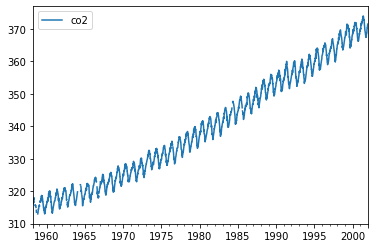

In [143]:
df.plot()

In [0]:
df.fillna(method='ffill', inplace=True)

In [0]:
r = pyper.R(use_pandas='True')

In [0]:
r.assign("data", df_r)

In [147]:
r("install.packages('tsfeatures', dependencies = TRUE)")

"try({install.packages('tsfeatures', dependencies = TRUE)})\nInstalling package into ‘/usr/local/lib/R/site-library’\n(as ‘lib’ is unspecified)\ntrying URL 'https://cran.rstudio.com/src/contrib/tsfeatures_1.0.1.tar.gz'\nContent type 'application/x-gzip' length 108061 bytes (105 KB)\n==================================================\ndownloaded 105 KB\n\n* installing *source* package ‘tsfeatures’ ...\n** package ‘tsfeatures’ successfully unpacked and MD5 sums checked\n** using staged installation\n** R\n** inst\n** byte-compile and prepare package for lazy loading\n** help\n*** installing help indices\n** building package indices\n** installing vignettes\n** testing if installed package can be loaded from temporary location\n** testing if installed package can be loaded from final location\n** testing if installed package keeps a record of temporary installation path\n* DONE (tsfeatures)\n\nThe downloaded source packages are in\n\t‘/tmp/RtmpVNcL1P/downloaded_packages’\n"

In [148]:
print(r("library(tsfeatures)"))

try({library(tsfeatures)})
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 
Registered S3 methods overwritten by 'forecast':
  method             from    
  fitted.fracdiff    fracdiff
  residuals.fracdiff fracdiff



In [149]:
print(r("print(data$co2[5:10])"))

try({print(data$co2[5:10])})
[1] 316.4 316.9   NaN 317.5 317.9   NaN



In [150]:
print(r("mylist <- list(data$co2)"))

try({mylist <- list(data$co2)})



In [151]:
print(r("myfeatures <- tsfeatures(mylist)"))

try({myfeatures <- tsfeatures(mylist)})



In [152]:
print(r("print(myfeatures)"))

try({print(myfeatures)})
# A tibble: 1 x 16
  frequency nperiods seasonal_period trend    spike linearity curvature e_acf1
      <dbl>    <dbl>           <dbl> <dbl>    <dbl>     <dbl>     <dbl>  <dbl>
1         1        0               1 0.985 3.92e-11      47.4      4.68  0.973
# … with 8 more variables: e_acf10 <dbl>, entropy <dbl>, x_acf1 <dbl>,
#   x_acf10 <dbl>, diff1_acf1 <dbl>, diff1_acf10 <dbl>, diff2_acf1 <dbl>,
#   diff2_acf10 <dbl>



In [0]:
df_feature = pd.DataFrame(r.get("myfeatures"))

In [154]:
df_feature

,frequency,nperiods,seasonal_period,trend,spike,linearity,curvature,e_acf1,e_acf10,entropy,x_acf1,x_acf10,diff1_acf1,diff1_acf10,diff2_acf1,diff2_acf10
0,1.0,0.0,1.0,0.98522,3.924203e-11,47.396277,4.681008,0.972523,5.224937,0.406164,0.993659,9.613112,0.083317,0.303269,-0.545803,0.32855
